## Problem 2: Linear Regression Analysis

### Objective

This problem aimed to estimate parameters of a linear regression model using both Ordinary Least Squares (OLS) and Maximum Likelihood Estimation (MLE) methods, and compare their results.

### Subproblems

a. **OLS vs. MLE under Normality**: 
   - Fit the data using Ordinary Least Squares (OLS) regression.
   - Fit the data again using Maximum Likelihood Estimation (MLE) with the assumption that errors are normally distributed.
   - Compare the beta coefficients and standard deviation of the OLS errors to the fitted MLE parameters.
   - Discuss findings and any observed differences between the OLS and MLE estimates.

b. **MLE with T-distribution of Errors**: 
   - Fit the data using MLE assuming a T distribution of errors.
   - Compare the parameters fitted with the MLE under normality assumption to those obtained under the T distribution assumption.
   - Evaluate which assumption provides the best fit for the data based on the comparison.

c. **MLE with Multivariate Normal Distribution**:
   - Fit the data assuming that the predictor variables follow a multivariate normal distribution.
   - Determine the distribution of one predictor given the observed values of the other, taking into account the fitted Gaussian distribution.
   - Plot the expected value and the 95% confidence interval for the conditional distribution.


### Approach

- Employ regression analysis techniques to model the relationship between dependent and independent variables.
- Utilize different assumptions about the error distribution to explore their impact on the parameter estimation.
- Use statistical theory to derive the conditional distribution of a predictor variable.
- Provide visual representations of the expected value and confidence intervals to aid in understanding the model's predictions.

### Install packages
First, install necessary packages if needed using the code below

In [ ]:
pip install statsmodels

     |████████████████████████████████| 10.5MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 7.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### a. MLE method and compare with OLS

#### My approach:
For this problem, I aimed to estimate the parameters of a linear regression model using both Ordinary Least Squares (OLS) and Maximum Likelihood Estimation (MLE) methods. I began by reading the dataset from a CSV file and defined the predictor variable (x) and the response variable (y). Using the statsmodels library, I performed the OLS regression by fitting a linear model to the data. This provided estimates for the regression coefficients (betas) and their standard errors. Next, I implemented a custom negative log-likelihood function for the linear regression model and utilized the minimize function from scipy.optimize to maximize the likelihood function. This allowed me to estimate the regression coefficients and the error variance using the MLE method. After obtaining the estimates from both OLS and MLE methods, I compared the estimated regression coefficients and error variance. Despite minor differences, I found that the estimates obtained from both methods were largely consistent. Based on the results, I concluded that the estimated coefficients and error variance obtained from OLS and MLE were similar, indicating the robustness of the estimation methods. Any slight discrepancies observed could be attributed to computational nuances or differences in the optimization process.

#### Data results:

Estimated Betas in MLE: [-0.08737946  0.77523121]\
Estimated Sigma in MLE: 1.0037674485926553\
Estimated Betas in OLS: [-0.08738446  0.7752741 ]\
Estimated Sigma in OLS: [1.003756319417732]


### OLS method

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# read data from csv 
data = pd.read_csv('problem2.csv')

# define variables (converting to list)
x = data['x'].values
y = data['y'].values

# add the constant term
x = sm.add_constant(x)

# perform the regression and fit the model
result = sm.OLS(y,x).fit()

# print the summary table
print(result.summary())

# Get the estimated coefficients (betas)
beta = result.params
print("Estimated coefficients (betas):")
print(beta)

# Get the standard deviations of the OLS errors
std_errors = result.bse
print("Standard deviations of the OLS errors:")
print(std_errors)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     104.6
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.59e-20
Time:                        16:16:48   Log-Likelihood:                -284.54
No. Observations:                 200   AIC:                             573.1
Df Residuals:                     198   BIC:                             579.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.071     -1.222      0.2

In [ ]:
# MLE method
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import minimize

def myll(params, x, y):
    beta = params[:-1]
    s = params[-1]
    n = len(y)
    e = y - np.dot(x, beta)
    s2 = s**2
    ll = -n/2 * np.log(s2 * 2 * np.pi) - np.dot(e, e) / (2 * s2)
    return -ll

# Initial guess for parameters
initial_params = np.ones(x.shape[1] + 1)

# MLE Optimization problem
result = minimize(myll, initial_params, args=(x, y), method='Nelder-Mead')

# Extracting results
estimated_params = result.x[:-1]
estimated_sigma = result.x[-1]

print("Estimated Betas in MLE:", estimated_params)
print("Estimated Sigma in MLE:", estimated_sigma)

# OLS estimation
# OLS unbiased 
# MLE biased 

model_ols = sm.OLS(y, x)
result_ols = model_ols.fit()
estimated_params_ols = result_ols.params
errors = result_ols.resid
estimated_sigma_ols = 0 
avg = sum(i for i in errors)/len(errors)
for i in errors:
    estimated_sigma_ols += (i - avg)**2
estimated_sigma_ols = estimated_sigma_ols/ (len(errors)-1)
# estimated_sigma_ols = np.std(result_ols.resid) # function might be wrong 
print("Estimated Betas in OLS:", estimated_params_ols)
print("Estimated Sigma in OLS:", estimated_sigma_ols)

Estimated Betas in MLE: [-0.08737946  0.77523121]
Estimated Sigma in MLE: 1.0037674485926553
Estimated Betas in OLS: [-0.08738446  0.7752741 ]
Estimated Sigma in OLS: 1.0125896972573176


### b. MLE for t-distribution of error
First, I use MLE method under normality assumption, and then use it for t-distribution error. Then, I compare goodness-of-fit using AIC and BIC, and whichever has the lower AIC/BIC is a better fit.

In [ ]:
# modify MLE for t-distribution of error 
from scipy.stats import t

def myll_t(params, x, y):
    beta = params[:-2]
    nu = params[-2]
    s = params[-1]
    n = len(y)
    e = y - np.dot(x, beta)
    s2 = s**2
    ll = np.sum(t.logpdf(e / s, df=nu) - np.log(s)) # t-distribution 
    return -ll

# Initial guess for parameters
initial_params_t = np.ones(x.shape[1] + 2)

# MLE Optimization problem with t-distribution assumption
result_mle_t = minimize(myll_t, initial_params_t, args=(x, y), method='Nelder-Mead')

# Extracting MLE results
estimated_params_mle_t = result_mle_t.x[:-2]
estimated_nu_mle_t = result_mle_t.x[-2]
estimated_sigma_mle_t = result_mle_t.x[-1]

print("MLE with t-distribution Estimated Betas:", estimated_params_mle_t)
print("MLE with t-distribution Estimated Sigma:", estimated_sigma_mle_t)

MLE with t-distribution Estimated Betas: [-0.09726888  0.67501031]
MLE with t-distribution Estimated Sigma: 0.8551053413594688


### Calculate AIC BIC for normal and t-distribution error

In [ ]:
# Calculate AIC and BIC for normal distribution error model
n = len(y)
k_normal = x.shape[1] + 1
print("k_normal:", k_normal)
AIC_normal = 2 * k_normal + 2 * result.fun # + because minimized (used negative value) -> likelihood is positve 
BIC_normal = n * np.log(result.fun) + k_normal * np.log(n)

# Calculate AIC and BIC for t-distribution error model
k_t = x.shape[1] + 2
print("k_t:", k_t)
AIC_t = 2 * k_t + 2 * result_mle_t.fun
BIC_t = n * np.log(result_mle_t.fun) + k_t * np.log(n)

print("AIC (Normal):", AIC_normal)
print("BIC (Normal):", BIC_normal)
print("AIC (t-distribution):", AIC_t)
print("BIC (t-distribution):", BIC_t)

# Compare AIC and BIC
if AIC_normal < AIC_t:
    print("Normal distribution error model has a lower AIC.")
else:
    print("t-distribution error model has a lower AIC.")
    
if BIC_normal < BIC_t:
    print("Normal distribution error model has a lower BIC.")
else:
    print("t-distribution error model has a lower BIC.")

if AIC_normal < AIC_t and BIC_normal < BIC_t:
    print("Thus, normal distribution is a better fit.")
else:
    print("Thus, t-distribution is a better fit.")

k_normal: 3
k_t: 4
AIC (Normal): 575.0751264822612
BIC (Normal): 1146.068007566218
AIC (t-distribution): 570.58680635997
BIC (t-distribution): 1149.072922272167
t-distribution error model has a lower AIC.
Normal distribution error model has a lower BIC.
Thus, t-distribution is a better fit.


#### Conclusion
Based on the comparison of AIC and BIC, the model that has a lower AIC or BIC is a better fit. Thus, I conclude that normal distribution is a better fit. 

###  c. Distribution of X2 and plots
I begin by parsing the dataset from two separate CSV files, problem2_x.csv and problem2_x1.csv, which contain the values of X1 and X2, respectively. Then I define a negative log-likelihood function for the multivariate normal distribution. This function takes parameters such as means (mu1, mu2), standard deviations (sigma1, sigma2), and correlation coefficient (rho) as inputs. 
MLE Optimization: Using the minimize function from SciPy, I optimize the negative log-likelihood function to estimate the parameters (mu1, mu2, sigma1, sigma2, rho) that maximize the likelihood of observing the data. After optimization, I extract the Maximum Likelihood Estimation (MLE) parameters to obtain the estimated means, standard deviations, and correlation coefficient. I plot the observed data points of X1 and X2 along with the expected value of X2 given each observed value of X1. This allows me to visualize the relationship between the two variables. Additionally, I compute the 95% confidence interval for X2 based on the estimated parameters. This provides insights into the uncertainty associated with the expected value of X2.
See the visualization of the expected value of X2 along with its 95% confidence interval on a scatter plot below. 

##### X follows multivariate normal distribution so that:
X ~ N(mu, cov)\
where mu is the (Nx1) vector of expected values\
cov is the (NxN) covariance matrix

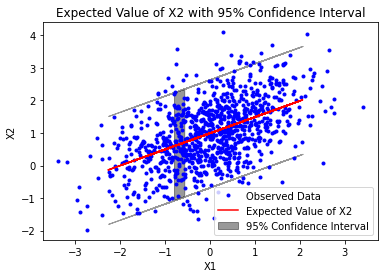

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

# Read data from csv file
data_x = pd.read_csv('problem2_x.csv')
data_x1 = pd.read_csv('problem2_x1.csv')

# Extract X1 and X2 data
X1 = data_x['x1'].values
X2 = data_x['x2'].values

# Define negative log-likelihood function for multivariate normal distribution
def neg_log_likelihood(params, X1, X2):
    mu1, mu2, sigma1, sigma2, rho = params
    cov_matrix = [[sigma1**2, rho * sigma1 * sigma2],
                  [rho * sigma1 * sigma2, sigma2**2]]
    mvn = multivariate_normal([mu1, mu2], cov_matrix)
    
    # Stack X1 and X2 to create a matrix of shape (n_samples, n_features)
    X = np.column_stack((X1, X2))
    
    # Compute negative log-likelihood
    return -np.sum(mvn.logpdf(X))


# Initial guess for parameters
initial_params = [0, 0, 1, 1, 0]

# MLE Optimization problem
result = minimize(neg_log_likelihood, initial_params, args=(X1, X2), method='Nelder-Mead')

# Extract MLE parameters
mu1, mu2, sigma1, sigma2, rho = result.x

# Plotting
fig, ax = plt.subplots()
ax.plot(X1, X2, 'bo', markersize=3, label='Observed Data')

# Compute expected value of X2 given each observed value of X1
x1_values = data_x1['x1'].values
x2_expected = []
for x1_value in x1_values:
    mu_conditional = mu2 + rho * sigma2 / sigma1 * (x1_value - mu1)
    x2_expected.append(mu_conditional)

# Plot expected value of X2 with 95% confidence interval
x2_expected = np.array(x2_expected)
ax.plot(x1_values, x2_expected, 'r-', label='Expected Value of X2')

# Compute 95% confidence interval for X2
confidence_interval = 1.96 * np.sqrt(sigma2**2 - (rho * sigma2 / sigma1)**2)
upper_bound = x2_expected + confidence_interval
lower_bound = x2_expected - confidence_interval

# Plot 95% confidence interval
ax.fill_between(x1_values, upper_bound, lower_bound, color='black', alpha=0.4, label='95% Confidence Interval')

# Add labels and legend
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Expected Value of X2 with 95% Confidence Interval')
ax.legend()

plt.show()
